

# **<span style="color:red" font-size="bolder"> Movie Rating Prediction</span>** 

## 1. Importing Necessary Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## 2. Loading Dataset

In [41]:
data = pd.read_csv("IMDb Movies India.csv",encoding='latin1')

## 3. Data Exploration

In [42]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [43]:
data.shape

(15509, 10)

In [44]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


### 3.1 Identifying Missing Values in Dataset :

In [46]:
data.isnull().mean()*100

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

## 4. Data PreProcessing

### 4.1 - Handling Missing Values in Dataset :

In [47]:
data.dropna(inplace= True)

In [48]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [49]:
# Remove commas and convert 'Votes' to integer
data['Votes'] = data['Votes'].str.replace(',', '', regex=True).astype(int)

In [50]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [51]:
data.shape

(5659, 10)

### 4.2 - Removing Duplicates from Dataset :

In [52]:
data.drop_duplicates(inplace = True)

In [53]:
data.shape

(5659, 10)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(1), object(8)
memory usage: 464.2+ KB


In [55]:
data.describe()

,Rating,Votes
count,5659.000000,5659.000000
mean,5.898533,2697.649585
std,1.381165,13651.503584
min,1.100000,5.000000
25%,5.000000,30.000000
50%,6.100000,131.000000
75%,6.900000,922.500000
max,10.000000,591417.000000


### 4.3 - Data Visualizations:

** - Rating Ditribution :**

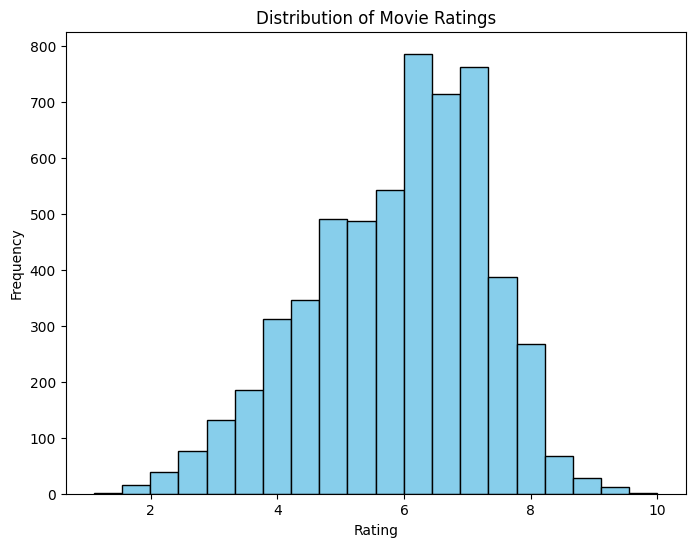

In [56]:
plt.figure(figsize=(8, 6))
plt.hist(data['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

** - Count of Movies Released Each Year:**

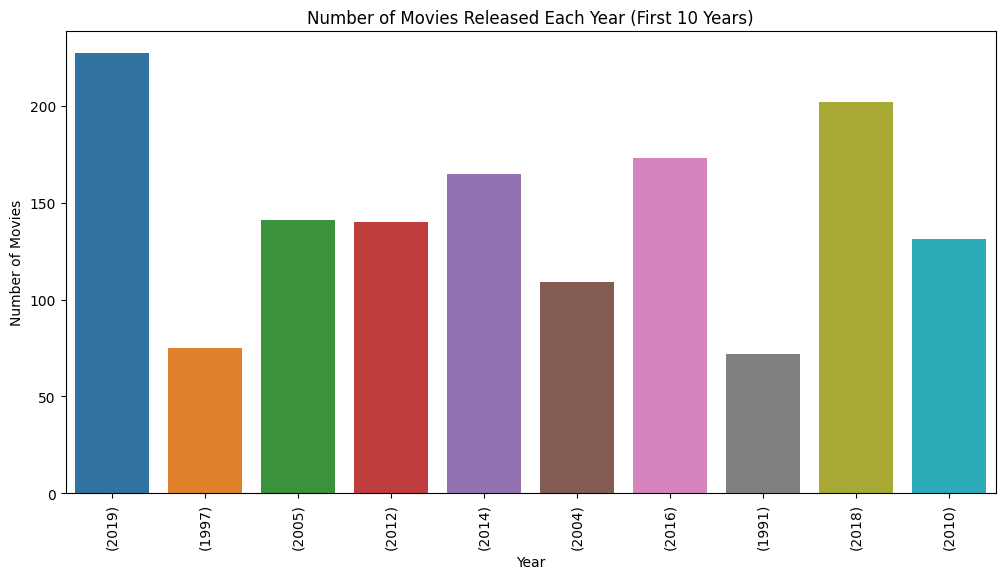

In [57]:
first_10_years = data['Year'].unique()[:10]

# Filter the DataFrame to include only data for these years
filtered_data = data[data['Year'].isin(first_10_years)]

# Create the countplot with the filtered data
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year (First 10 Years)')
plt.xticks(rotation=90)
plt.show()

**. Movie Rating vs Votes :**

<Axes: xlabel='Rating', ylabel='Votes'>

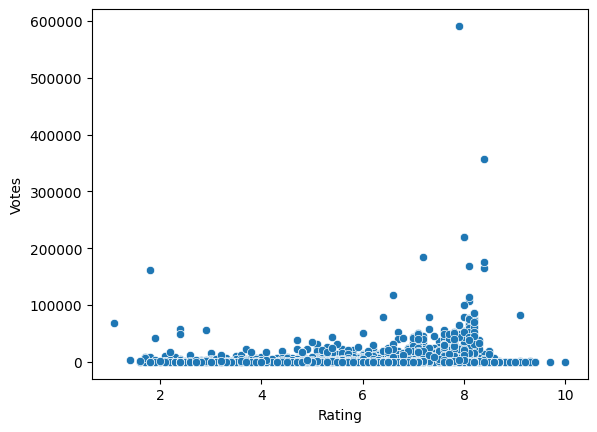

In [59]:
sns.scatterplot(x='Rating', y ='Votes', data=data)

###  - Encoding text data into Numerical form

In [60]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [61]:
categorical_features = ['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

###  - Defining Features and and Target variable

In [62]:
x = data[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']]
y = data['Rating']

In [63]:
print(x)

       Genre  Director  Actor 1  Actor 2  Actor 3
1        229       629     1352     2272      319
3        184      1335     1198      719     2148
5        157      1530      378       75     2045
6        289      2044      692     1112     2524
8        320       135     1934     1175     1013
...      ...       ...      ...      ...      ...
15493    229      1223     1861     1801     1615
15494    133      2059      763     1619     1184
15503     28      1793      406      754     1685
15505     38      1025      112     2164      314
15508     38       895      468      753      303

[5659 rows x 5 columns]


In [64]:
print(y)

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64


###  - Data Standardization

In [65]:
scaler = StandardScaler()

In [66]:
standardized_data = scaler.fit_transform(x)

In [67]:
x = standardized_data
y = data['Rating']

In [68]:
print(x)

[[ 0.52931791 -0.84886812  0.6816723   1.63359215 -1.32934107]
 [ 0.11341838  0.17933035  0.40902916 -0.69552904  1.21099562]
 [-0.13612133  0.46332284 -1.04270705 -1.66137196  1.06793675]
 ...
 [-1.32836665  0.84634861 -0.99313557 -0.64303758  0.56792515]
 [-1.23594453 -0.2721449  -1.51363611  1.47161849 -1.33628568]
 [-1.23594453 -0.46147323 -0.88337015 -0.64453734 -1.35156381]]


In [69]:
print(y)

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64


###  - Splitting data into Training and Testing Model

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [71]:
print(x.shape, x_train.shape, x_test.shape)

(5659, 5) (4527, 5) (1132, 5)


##  - Model Building & Training

For this Regression task like predicting a continuos value, we'll use Random Forest Regresssion model.

In [72]:
regressor = RandomForestRegressor(n_estimators=100)

In [73]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

## Model Evaluation

In [74]:
# Accuracy of training data
x_train_prediction = regressor.predict(x_train)
mae = mean_absolute_error(x_train_prediction, y_train)
print("Mean Absolute error: ", mae)

Mean Absolute error:  0.388797096784373


In [75]:
# Accuracy of testing data
x_test_prediction = regressor.predict(x_test)
mae = mean_absolute_error(x_test_prediction, y_test)
print("Mean Absolute error: ", mae)

Mean Absolute error:  1.0467352894161197
